In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Célula de Configuração do Monitoramento (adicionar no início)

# 1. Instalar bibliotecas para monitoramento
!pip install psutil pynvml

# 2. Importar tudo o que vamos precisar
import time
import threading
import psutil
import pynvml
import pandas as pd
import matplotlib.pyplot as plt

# 3. Definir a classe que fará o monitoramento
class ResourceMonitor:
    def __init__(self, interval=5):
        self.interval = interval
        self.data = []
        self._stop_event = threading.Event()
        self.thread = threading.Thread(target=self.run, daemon=True)

        # Inicializa a NVML para monitoramento da GPU
        try:
            pynvml.nvmlInit()
            self.gpu_count = pynvml.nvmlDeviceGetCount()
        except pynvml.NVMLError:
            self.gpu_count = 0
            print("AVISO: Placa NVIDIA não encontrada ou driver indisponível. O monitoramento da GPU será desativado.")

    def _get_gpu_ram_usage(self):
        if self.gpu_count == 0:
            return 0
        handle = pynvml.nvmlDeviceGetHandleByIndex(0)
        info = pynvml.nvmlDeviceGetMemoryInfo(handle)
        return info.used / (1024**3)  # Convertido para GB

    def run(self):
        """O método que roda em segundo plano para coletar dados."""
        start_time = time.time()
        while not self._stop_event.is_set():
            timestamp = time.time() - start_time

            # Coleta de dados
            sys_ram_used = psutil.virtual_memory().used / (1024**3) # GB
            gpu_ram_used = self._get_gpu_ram_usage() # GB
            disk_used = psutil.disk_usage('/').used / (1024**3) # GB

            self.data.append([timestamp, sys_ram_used, gpu_ram_used, disk_used])
            time.sleep(self.interval)

        if self.gpu_count > 0:
            pynvml.nvmlShutdown()

    def start(self):
        """Inicia o monitoramento."""
        print("Iniciando monitoramento de recursos...")
        self.thread.start()

    def stop(self):
        """Para o monitoramento."""
        self._stop_event.set()
        self.thread.join()
        print("Monitoramento de recursos finalizado.")
        return pd.DataFrame(self.data, columns=['Tempo (s)', 'RAM Sistema (GB)', 'RAM GPU (GB)', 'Disco (GB)'])

    def plot(self):
        """Plota os dados coletados."""
        df = self.stop()

        if df.empty:
            print("Nenhum dado de monitoramento foi coletado.")
            return

        fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)
        fig.suptitle('Utilização de Recursos do Sistema Durante a Execução', fontsize=16)

        # Gráfico de RAM do Sistema
        axes[0].plot(df['Tempo (s)'], df['RAM Sistema (GB)'], label='RAM do Sistema Utilizada', color='blue')
        axes[0].set_ylabel('Uso (GB)')
        axes[0].set_title('Uso de RAM do Sistema')
        axes[0].grid(True)
        axes[0].legend()
        axes[0].fill_between(df['Tempo (s)'], df['RAM Sistema (GB)'], alpha=0.1, color='blue')

        # Gráfico de RAM da GPU
        if self.gpu_count > 0:
            axes[1].plot(df['Tempo (s)'], df['RAM GPU (GB)'], label='RAM da GPU Utilizada', color='green')
        else:
            axes[1].text(0.5, 0.5, 'Monitoramento de GPU não disponível', ha='center', va='center')
        axes[1].set_ylabel('Uso (GB)')
        axes[1].set_title('Uso de RAM da GPU')
        axes[1].grid(True)
        axes[1].legend()
        axes[1].fill_between(df['Tempo (s)'], df['RAM GPU (GB)'], alpha=0.1, color='green')

        # Gráfico de Uso de Disco
        axes[2].plot(df['Tempo (s)'], df['Disco (GB)'], label='Espaço em Disco Utilizado', color='red')
        axes[2].set_xlabel('Tempo (segundos)')
        axes[2].set_ylabel('Uso (GB)')
        axes[2].set_title('Uso de Disco')
        axes[2].grid(True)
        axes[2].legend()
        axes[2].fill_between(df['Tempo (s)'], df['Disco (GB)'], alpha=0.1, color='red')

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

# 4. Iniciar o cronômetro e o monitoramento
# (Coloque estas 2 linhas logo antes do seu código principal começar a rodar)
tempo_inicial = time.time()
monitor = ResourceMonitor(interval=5) # O 'interval' é em segundos
monitor.start()

Iniciando monitoramento de recursos...


# Imports

In [ ]:
!pip install pretty_midi
!apt-get install -y fluidsynth
!pip install midi2audio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 74.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 5.0 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592286 sha256=81c6a111db8fce0f513fb4c96acbf152df233f34ae4f83552fff8ce027e89c1f
  Stored in directory: /root/.cache/pip/wheels/a4/f9/9e/08350c27e386558df0ae234e28a8facd145ba45506ddd1b989
Successfully built pretty_midi
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libevdev2 libfluidsynth3 libgudev-1.0-0 libinput-bin
  libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a libqt5dbus5
  libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libxcb-icccm4 libxcb-image0 libxcb-keysyms1
  libxcb-render-util0 libxcb-util1 libxcb-xinerama0 libxcb-xin

In [ ]:
from tqdm import tqdm
import os
import math
import random
import pandas as pd
import numpy as np
import IPython
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython import *
import os
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split
import pretty_midi
import torch
import math as m
import torch.optim as optim
import collections
from itertools import chain
from torch import tensor
from midi2audio import FluidSynth
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

# Dataloading and Featurizing
Basiclly a midi(Musical Instrument Digital Interface) note conistes of four things pitch, start time, end time, and volume. What I do first is take the Midi and convert it to a tensor containing the pitch, and volume, the duritation between the last note and the current note, and duration of the note. I changed the repersenations of timings to reduce the range of the timing vaules.

Then I shifted the timings to be in 16 notes, and tokenized the data, then clamped the range of some features so I could put all the vaules in one tensor without padding. I use preprocessed data because it takes ~ an hour to process maestro.

In [ ]:
volume = 50
def untenosrize(t): return [pretty_midi.containers.Note(volume, int(note[0]), float(note[1]), float(note[2])) for note in t]
def tenosrize(r):
    a = pretty_midi.PrettyMIDI(r)
    tnotes = []
    for b in a.instruments:
        b = b.notes
        notes =  tensor([[c.pitch, c.start, c.get_duration()] for c in b])
        tnotes.append(notes)
    return tnotes[0]
def dic(t, dics):
    shape = t.shape
    t = t.clone()
    for a in range(3):
        for b in tqdm(range(len(t[:, a]))):
            t[b, a] = dics[a].index([t[b, a].item()])
    t = t.type(torch.int)
    return t.reshape(shape)
def dic(t, dics):
    t = t.clone()
    for a in range(3):
        t[:, a] = tensor([dics[a].index([t[b, a].item()]) for b in range(len(t[:, a]))])
    return t.type(torch.int)
def undic(t, dics):
    shape = t.shape
    l = []
    for a in range(3):
        l.append(tensor(list(map(dics[a].__getitem__, t[:, a]))))
    l = torch.stack(l, dim=1)
    return l.reshape(shape)
def featurize(t):
    index = torch.argsort(t[:, 1], dim=0)
    t = torch.stack([t[int(a)] for a in index])
    out = t[1:, 1] - t[:-1, 1]
    t[1:, 1]= out
    return t
def unfeaturize(t):
    t = t.clone()
    for a in range(len(t)-1):
        out = t[a+1, 1]+ t[a, 1]
        t[a+1, 1]= out
    out = t[:, 2]+t[:, 1]
    t[:, 2] = out
    return t

In [ ]:
path = '/content/drive/MyDrive/maestro-v3.0.0'
subdir = [x[0] for x in os.walk(path)][1:]
data = []
for files in subdir:
    for file in os.listdir(files):
        data.append(os.path.join(files, file))
time_step = 32

In [ ]:
# Função de construção
def get_dics(directory):
    song = []
    for t in tqdm(directory):
        t = featurize(tenosrize(t))
        t[:, 1] = torch.clamp(t[:, 1], max=3.9687)
        t[:, 2] = torch.clamp(t[:, 2], min=1/time_step , max=4)
        song.append(t)
    t = torch.cat(song)
    t[:, [1,2]] = torch.round(t[:, [1,2]]*time_step)/time_step
    dics = [list(np.array(torch.unique(t[:, a]).type(torch.float))) for a in range(3)]
    dics[0] = [np.float32(a) for a in range(128)]
    return t, dics

# Rodar tudo do zero (sem usar arquivos salvos)
t, dics = get_dics(data)  # <- 'data' deve estar carregada

songs = dic(t, dics)      # <- essa função também precisa estar definida corretamente

# Função de reconstrução
def unlatent(t, dics=dics):
    t = undic(t, dics)
    t = untenosrize(unfeaturize(t))
    return t


100%|██████████| 1276/1276 [13:24<00:00,  1.59it/s]


In [ ]:
batch_size = 32
sequence_len = 128
split = torch.split(songs, sequence_len)[:-1]
x , y = torch.stack(split)[1:], torch.stack(split)[:-1]
dslen = len(x)//10
xtrain, ytrain = x[:dslen*9], y[:dslen*9]
xtest, ytest = x[dslen*9:], y[dslen*9:]
class trainset(Dataset):
    def __init__(self, data):
        self.x, self.y = data
    def __len__(self): return len(self.x)
    def __getitem__(self, index):
        y = self.y[index]
        y = nn.functional.one_hot(y.type(torch.long), num_classes=len(dics[2]))
        return self.x[index], y
train, test = trainset([xtrain, ytrain]), trainset([xtest, ytest])
train, test = DataLoader(train, batch_size=batch_size, shuffle = True), DataLoader(test, batch_size=batch_size, shuffle = True)

This is a test song after going through featurizing and compression, definatble noticable, but it will make the model work a lot better. Particular notes that are split into three parts aren't nicely presevered by 16th note compression. The only way i could get to display audio was through synthensizer library so that's why all the display audio sounds like it's form a syntehsizer, the higher quality unsynthesied audio is in the output of this notebook.

In [ ]:
t, tok = get_dics(data[:2])
lat = dic(t, tok)
qwe = unlatent(lat, tok)
mid = pretty_midi.PrettyMIDI(data[0])
p1 = "test_uncompressed.mid"
p2 = "test_compressed.mid"
mid.write(p1)
mid.instruments[0].notes = qwe
mid.write(p2)
fs = 44000

100%|██████████| 2/2 [00:00<00:00,  2.08it/s]


In [ ]:
# oringal
mid = pretty_midi.PrettyMIDI(p1)
IPython.display.Audio(mid.synthesize(fs=fs), rate=fs)

In [ ]:
#compressed
mid = pretty_midi.PrettyMIDI(p2)
IPython.display.Audio(mid.synthesize(fs=fs), rate=fs)

# Generate music with model

In [ ]:
p = data[0]
numiter = range(999).__iter__()
def gener(gen, x, dis= None, sequences=100, escape_count=10):
    output = []
    gen.to(device)
    output = []
    for a in range(sequences):
        if dis==None:
            x = gen(x, generate=True)
        else:
            dis.to(device)
            samples = [gen(x.type(torch.int), generate=True).type(torch.float32) for a in range(escape_count)]
            score = [dis(samples[a]) for a in range(escape_count)]
            x = samples[score.index(max(score))]
        output.append(x)
    return undic(torch.cat(output, dim=1).squeeze().type(torch.int), dics)
def make_song(gen, p=p, sequence_len=sequence_len, dis=None, sequences= 25, escape_count=10, evalu=False):
    with torch.no_grad():
        if evalu:
            model.eval()
        else: model.train()
        x,y = next(iter(train))
        x = x[0].unsqueeze(dim=0)
        preds = gener(gen, x.to(device), dis=dis, sequences=sequences, escape_count=escape_count)
        out = untenosrize(unfeaturize(preds.squeeze()))
        mid = pretty_midi.PrettyMIDI(p)
        mid.instruments[0].notes = out
        itera = str(numiter.__next__())
        mid.write("song " + itera + '.mid')

# Model
I addatied this transformer from the pytorch docs (https://pytorch.org/tutorials/beginner/transformer_tutorial.html)
A lot of the stuff I read said sparse transformers worked better which I might try a some point.

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = sequence_len):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(batch_size, max_len, 1, d_model)
        pe[:, :, 0, 0::2] = torch.sin(position * div_term)
        pe[:, :, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)
    def forward(self, x):
        x = x + self.pe[:x.size(0)]
        return self.dropout(x)
def compose(f, x): return f(x)
class transformer(nn.Module):
    def __init__(self, d_model=1024, nhead=16, d_hid=16, nlayers=6, dropout= 0.25, nembeds=128):
        super().__init__()

        self.pos_encoder = PositionalEncoding(d_model, dropout)
        self.embeds = nn.Embedding(nembeds, d_model)
        self.pos_embeds = PositionalEncoding(d_model, dropout)
        layers = nn.TransformerEncoderLayer(d_model*3, nhead, d_hid, dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(layers, nlayers)
        self.decoder = nn.Linear(d_model*3, nembeds*3)

        self.dropout = nn.Dropout(dropout)
        self.d_model = d_model
        self.mask = torch.triu(torch.ones(sequence_len, sequence_len) * float('-inf'), diagonal=1).to(device)

    def forward(self, x, generate=False):
        x = self.embeds(x)* math.sqrt(self.d_model)
        x = self.pos_embeds(x)
        sp = x.shape
        x = torch.reshape(x, (sp[0], sp[1], (self.d_model*3)))
        x = self.transformer_encoder(x, self.mask)
        x= self.decoder(x)
        shap = x.shape
        x = torch.reshape(x, (shap[0], shap[1], 3, shap[2]//3))
        if generate:
            x = torch.argmax(x, dim=3)
        return x

# Evaulation function

In [ ]:
def eval(model, dis=None):
    model.eval()
    model.to(device)
    with torch.no_grad():
        loss, false_preds, true_preds = [], [], [ ]
        count = 0
        for x,y in test:
            x,y = x.to(device), y.to(device)
            if count == 0:
                shape = torch.numel(x)
                count = 1
            preds = model(x)
            if dis != None:
                gen = torch.argmax(preds, dim=3)
                dis.to(device)
                false_preds.append(dis(gen).mean().item())
                true_preds.append(dis(x).mean().item())
            loss.append(creloss(preds, y).item())
        numelloss = round((sum(loss)/len(loss))/shape, 4)
        avloss = round(sum(loss)/len(loss), 4)
        if dis != None:
            false_preds = round(sum(false_preds)/len(false_preds), 4)
            true_preds = round(sum(true_preds)/len(true_preds), 4)
            print("Eval batch loss " + str(avloss) + " numel loss " + str(numelloss) + " False " + str(false_preds) + " True " + str(true_preds))
        else:
            print("Eval batch loss " + str(avloss) + " numel loss " + str(numelloss))

# Traing loop
Here their's a custom Cross entropy loss becuase pytorch's inbuilt CEL doesn't work on these are dimensions

In [ ]:
from tqdm import tqdm
def smax(t): return t.exp()/torch.sum(t.exp(), dim=2, keepdim=True)
def creloss(x, y):
    shap = x.shape
    x = smax(x)
    return -torch.sum(y*torch.log(x))
def fit(model, dl, epochs=1, lr=0.0001):
    count = 0
    model.to(device)
    lossfunc = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    model.train()
    total_loss = []
    count = 0
    for a in range(epochs):
        for x,y in tqdm(dl):
            if count == 0:
                shape = torch.numel(x)
                count +=1
            x,y = x.to(device), y.to(device)
            preds = model(x)
            loss = creloss(preds, y)
            with torch.no_grad():
                total_loss.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        avloss = sum(total_loss)/len(total_loss)
        print("training batch loss " + str(avloss) + " numel loss " + str(avloss/shape))
        eval(model)

In [ ]:
model = transformer()
fit(model, train, lr=0.0001, epochs=2)
torch.save(model, "music_transformer.pkl")
make_song(model)
make_song(model, evalu=True)

100%|██████████| 1547/1547 [19:06<00:00,  1.35it/s]


training batch loss 5710.94586927319 numel loss 0.4647579646218416
Eval batch loss 5814.9357 numel loss 0.4732


100%|██████████| 1547/1547 [18:56<00:00,  1.36it/s]


training batch loss 5657.228212619182 numel loss 0.46038641053216
Eval batch loss 5802.8851 numel loss 0.4722


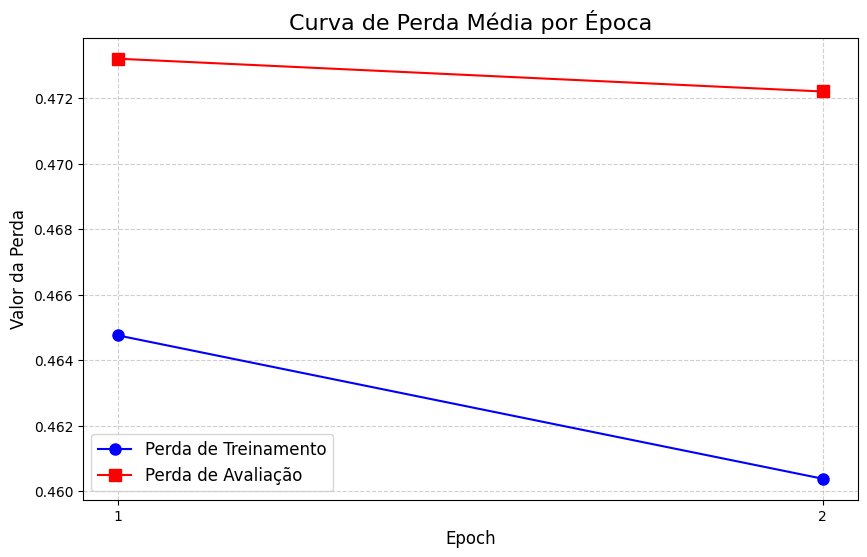

In [ ]:
import matplotlib.pyplot as plt

# Dados extraídos do seu log de treinamento (Transformer, Rodada 1)
epochs = [1, 2]

# --- Valores de NUMEL LOSS (Perda Média por Elemento) ---
# Extraindo os valores de 'numel loss' do treinamento
train_numel_loss = [0.4647579646218416, 0.46038641053216]

# Extraindo os valores de 'numel loss' da avaliação
eval_numel_loss = [0.4732, 0.4722]
# ----------------------------------------------------

# --- Criar o Gráfico ---
plt.figure(figsize=(10, 6))

# Plotar a Perda Numel de Treinamento
plt.plot(epochs, train_numel_loss, 'bo-', label='Perda de Treinamento', markersize=8)

# Plotar a Perda Numel de Avaliação
plt.plot(epochs, eval_numel_loss, 'rs-', label='Perda de Avaliação', markersize=8)

# --- Adicionar Títulos e Legendas ---
plt.title('Curva de Perda Média por Época', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Valor da Perda', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# Ajustar os marcadores do eixo X para mostrar apenas 1 e 2
plt.xticks(epochs)

# Exibir o gráfico
plt.show()

In [ ]:
mid = pretty_midi.PrettyMIDI("song 0.mid")
IPython.display.Audio(mid.synthesize(fs=fs), rate=fs)

In [ ]:
mid = pretty_midi.PrettyMIDI("song 1.mid")
IPython.display.Audio(mid.synthesize(fs=fs), rate=fs)

# Discriminator
Since the transformer use dropout when generating new songs, their is some randomness in the generated sample. To take advantage of with this a Discriminator picks the best sample out of a few generated samples. The Discriminator is an lstm followed by convulations, that's heavly normalized (50% dropout).

In [ ]:
class discriminator(nn.Module):
    def __init__(self, input_dim=3, lin_dim=256, lstm_dim=256, lstm_layers=4, dropout=0.5):
        super().__init__()
        self.droupout = nn.Dropout(dropout)
        self.mlp = nn.Sequential(
            nn.Linear(input_dim, lin_dim // 2),
            nn.LeakyReLU(0.2),
            nn.Linear(lin_dim // 2, lin_dim),
            nn.LeakyReLU(0.2))
        self.conv = nn.Sequential(
            nn.Conv1d(lstm_dim, 8, 8, 4),
            nn.LeakyReLU(0,1),
            nn.Conv1d(8, 1, 8, 8),
            nn.LeakyReLU(0,1),
            nn.Linear(3, 1))
        self.act= nn.Sigmoid()
        self.lin = nn.Sequential(nn.Linear(4, 1))
        self.lstm = nn.LSTM(input_size=lin_dim, hidden_size=lstm_dim, num_layers=lstm_layers, batch_first=True, dropout=dropout, bidirectional=False)

    def forward(self, x):
        x = x.type(torch.float)
        x = self.mlp(x)
        x, h = self.lstm(x)
        x = self.conv(x.permute(0, 2, 1)).permute(0, 1, 2)
        return self.act(x.squeeze())

In [ ]:
def traindis(gen, dis, epochs=1, lr=0.001, noise_scale=10):
    dis_opt =  optim.Adam(dis.parameters(), lr=lr)
    gen.train().to(device)
    dis.train().to(device)
    lossfunc = nn.BCELoss().to(device)
    for a in range(epochs):
        for x,y  in tqdm(train):
            x, y =x.to(device), y.to(device)
            y = torch.argmax(y, dim=3).type(torch.float32)
            dis_opt.zero_grad()
            fake = gen(x, generate=True).type(torch.float32)
            fake_preds = dis(fake)
            real_preds= dis(y)
            fake_loss = lossfunc(fake_preds, (torch.zeros_like(fake_preds)))
            real_loss = lossfunc(real_preds,(torch.ones_like(real_preds)))
            dis_loss = (fake_loss + real_loss)/2
            dis_loss.backward()
            dis_opt.step()
        eval(model, dis)

In [ ]:
dis = discriminator()
traindis(model, dis)
make_song(model, dis=dis)
mid = pretty_midi.PrettyMIDI("song 2.mid")
IPython.display.Audio(mid.synthesize(fs=fs), rate=fs)

In [ ]:
from midi2audio import FluidSynth
fs = FluidSynth('/content/drive/MyDrive/soundfonts/FluidR3_GM.sf2')  # certifique-se que o arquivo .sf2 está presente
fs.midi_to_audio('test.mid', 'test.wav')


# Conclusion
The music is alright, about a quater the time the music localy compareble to human made samples, but it lacks any  long term conistancy. This was a good project still with lots of ways to impove this model.


--- Relatório Final de Execução ---
Tempo de Execução Total: 1h 23min 0s
Monitoramento de recursos finalizado.


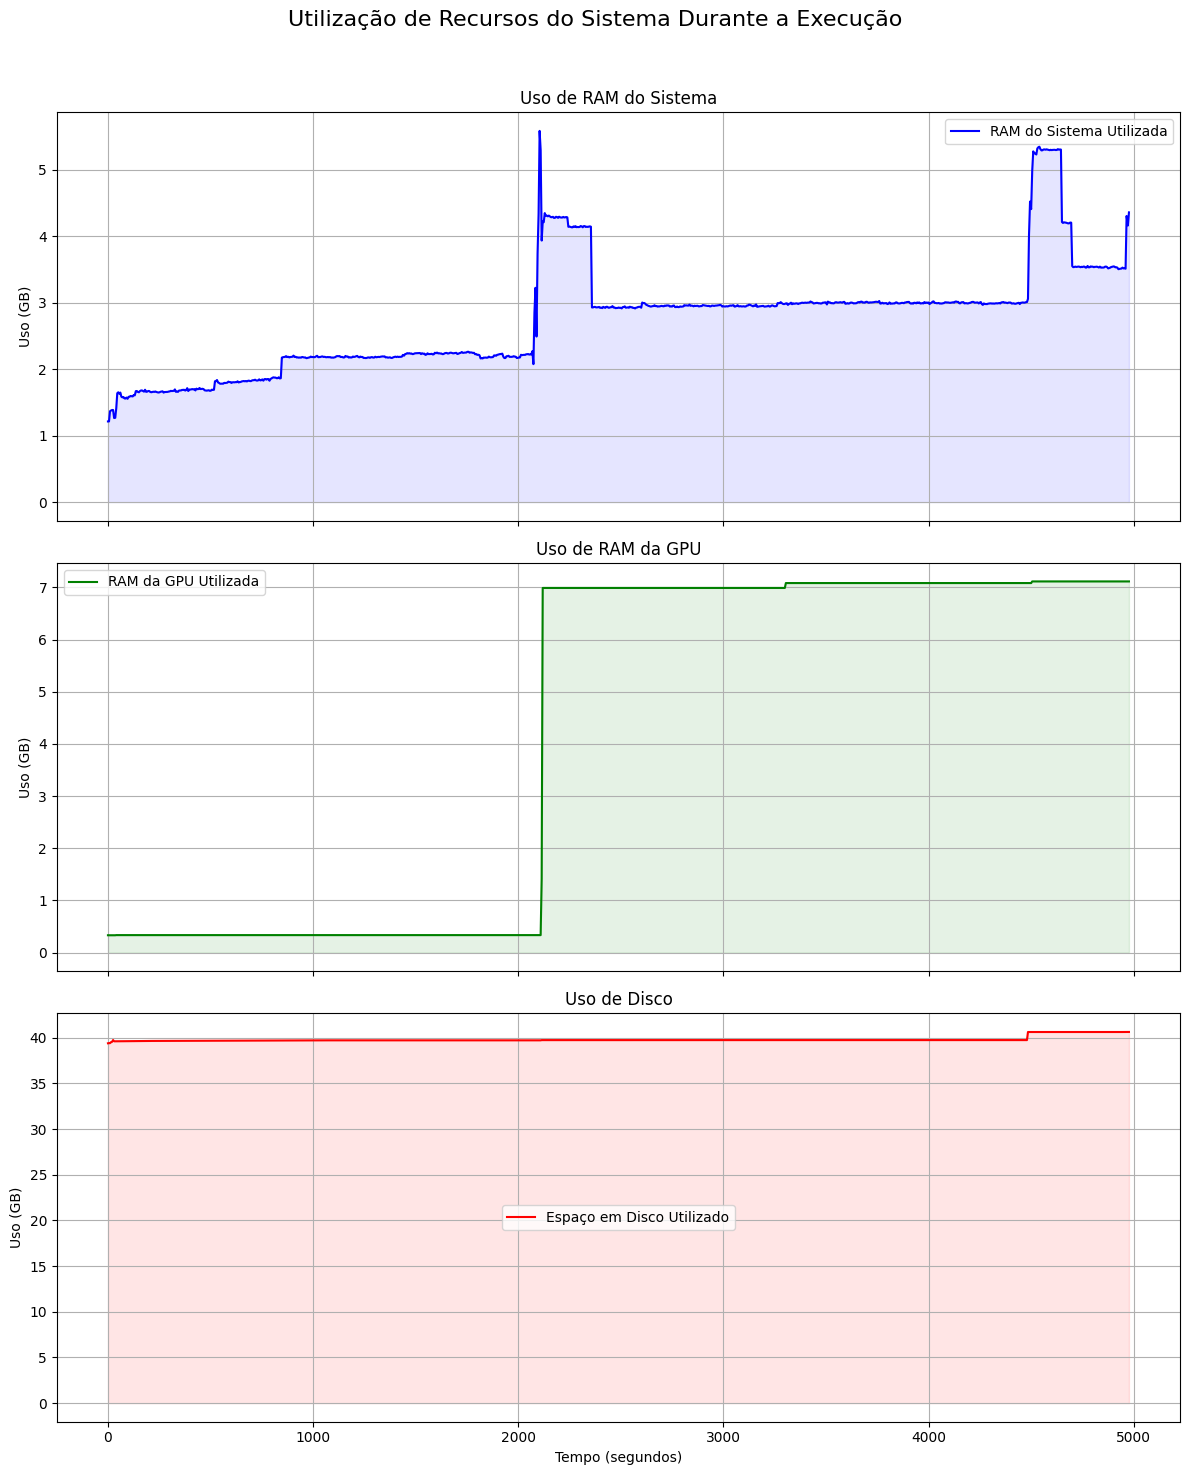

In [ ]:
# Célula de Finalização e Plotagem (adicionar no final)

# 1. Parar o cronômetro e calcular o tempo total
tempo_final = time.time()
tempo_total_segundos = tempo_final - tempo_inicial

# Formatando o tempo para horas, minutos e segundos
horas = int(tempo_total_segundos // 3600)
minutos = int((tempo_total_segundos % 3600) // 60)
segundos = int(tempo_total_segundos % 60)

print("\n--- Relatório Final de Execução ---")
print(f"Tempo de Execução Total: {horas}h {minutos}min {segundos}s")

# 2. Parar o monitor e gerar o gráfico de uso de recursos
# A função plot() já chama o stop() e processa os dados
monitor.plot()